# BASIC GLS PERIODOGRAMS RESULTS ANALYSIS FOR NZP-CORRECTED CARMENES RV CURVES

We review the basic results of the GLS periodograms applied over the RV curves of NZP-corrected CARMENES GTO objects (CARM_VIS), specially looking at the wrong records.


## Modules and configuration

### Modules

In [1]:
import pandas as pd

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize = (15, 10), dpi = 80)

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

<Figure size 1200x800 with 0 Axes>

### Configuration

In [2]:
GTO_FILE = "../data/CARM_VIS_objects_with_PG.csv"
#GTO_FILE = "../data/SELECTION_GTO_objects_with_PG.csv"
RV_FOLDER = "../data/CARM_VIS_RVs/"

IMAGE_FOLDER = "./img/"

ALPHA = 1e-3 # Significance threshold for statistical tests

### Functions

In [3]:
def draw_hist(d1, d1_label, fig_filename=None):
    '''Draws an histogram of the values passed. It also calulates the statistics
    and tests the goodness of fit by a Gaussian distribution'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    plt.title(d1_label + " values distribution", fontsize=16)
    plt.grid(axis='both', alpha=0.75)
    plt.xlabel(d1_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.distplot(d1, label=d1_label, **kwargs)
    #sns.histplot(d1, label=d1_label)
    #plt.xlim(0,100)
    #plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='png')
    # Display basic statistics:
    print(pd.Series(d1).describe())
    # Perform the normaltest (D'Agostino and Pearson) for Gaussian distribution fit:
    k2, p = normaltest(d1)
    alpha = ALPHA
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("***This distribution does NOT come from a Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))
    else:
        print("This distribution MIGHT come from Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))

## Load CARM_VIS table with GLS results

In [4]:
gto = pd.read_csv(GTO_FILE, sep=',', decimal='.')
gto.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000997,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23585+076_RV_PG.dat,NaN
1,J23556-061,GJ 912,AB,912,358.913617,-6.144283,23:55:39.78,-06:08:33.4,88.129933,-65.175491,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000998,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23556-061_RV_PG.dat,NaN
2,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
3,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
4,J23492+024,BR Psc,-,908,357.306604,2.396918,23:49:12.53,+02:24:04.4,93.567467,-56.885396,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.001995,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23492+024_RV_PG.dat,NaN


In [5]:
print(list(gto.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

### Addendum: correct some RV column names

In [6]:
if 'f_RV' in list(gto.columns):
    print("Correcting column names...")
    gto.rename(columns={'f_RV': 'f_PG_RV', 'e_f_RV': 'e_f_PG_RV',
                        'Pd_RV': 'Pd_PG_RV', 'e_Pd_RV': 'e_Pd_PG_RV',
                        'Ph_RV': 'Ph_PG_RV', 'e_Ph_RV': 'e_Ph_PG_RV',
                        'Pm_RV': 'Pm_PG_RV', 'e_Pm_RV': 'e_Pm_PG_RV',
                        'A_RV': 'A_PG_RV', 'e_A_RV': 'e_A_PG_RV',
                        'ph_RV': 'ph_PG_RV', 'e_ph_RV': 'e_ph_PG_RV',
                        'T0_RV': 'T0_PG_RV', 'e_T0_RV': 'e_T0_PG_RV',
                        'offset_RV': 'offset_PG_RV', 'e_offset_RV': 'e_offset_PG_RV',
                        'FAP_RV': 'FAP_PG_RV', 'elapsed_time_RV': 'elapsed_time_PG_RV'},
               inplace=True)
    gto.to_csv(GTO_FILE, sep=',', decimal='.', index=False)
else:
    print("No correction needed.")
gto.head()

No correction needed.


,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000997,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23585+076_RV_PG.dat,NaN
1,J23556-061,GJ 912,AB,912,358.913617,-6.144283,23:55:39.78,-06:08:33.4,88.129933,-65.175491,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000998,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23556-061_RV_PG.dat,NaN
2,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
3,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
4,J23492+024,BR Psc,-,908,357.306604,2.396918,23:49:12.53,+02:24:04.4,93.567467,-56.885396,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.001995,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23492+024_RV_PG.dat,NaN


In [8]:
gto.shape

(390, 300)

## Analysis of results

### Exceptions

#### Objects which calculation failed

We first check how many objects had problems and could not complete the calculation.

In [9]:
gto.loc[gto['valid_PG_RV'] == 0, ['Karmn', 'error_PG_RV']].shape

(3, 2)

Hence, periodogram calculation was unsuccessful for three (3) objects.

In [10]:
gto.loc[gto['valid_PG_RV'] == 0, ['Karmn', 'error_PG_RV']]

,Karmn,error_PG_RV
100,J17572+707,zero-size array to reduction operation minimum...
126,J16102-193,zero-size array to reduction operation minimum...
331,J04173+088,zero-size array to reduction operation minimum...


We can check the RV curve of one of each instance:

In [11]:
objeto = "J17572+707"
rv = pd.read_csv(RV_FOLDER + objeto + ".avc.dat",
                 sep=' ', decimal='.',
                 names=['Date', 'rv', 'e_rv'])
rv.head()

,Date,rv,e_rv


**OBSERVATION:** RV file is empty!

In [13]:
objeto = "J16102-193"
rv = pd.read_csv(RV_FOLDER + objeto + ".avc.dat",
                 sep=' ', decimal='.',
                 names=['Date', 'rv', 'e_rv'])
rv.head()

,Date,rv,e_rv


**OBSERVATION:** RV file is empty!

In [14]:
objeto = "J04173+088"
rv = pd.read_csv(RV_FOLDER + objeto + ".avc.dat",
                 sep=' ', decimal='.',
                 names=['Date', 'rv', 'e_rv'])
rv.head()

,Date,rv,e_rv


**OBSERVATION:** RV file is empty!

#### Objects that take too long to complete

This time, no object took too long to complete.

In [15]:
gto[['Karmn', 'elapsed_time_PG_RV']].sort_values(by='elapsed_time_PG_RV', ascending=False)

,Karmn,elapsed_time_PG_RV
99,J17578+046,91.976841
281,J07274+052,88.575336
14,J22565+165,87.877729
207,J11033+359,75.816757
288,J06548+332,71.686206
...,...,...
329,J04219+213,38.232725
244,J09286-121,38.198872
126,J16102-193,0.008643
100,J17572+707,0.005986


#### Objects which peak frequency is in the lower limit

In [16]:
gto[['Karmn', 'f_PG_RV', 'e_f_PG_RV']].dropna().sort_values(by='f_PG_RV', ascending=False)

,Karmn,f_PG_RV,e_f_PG_RV
338,J03230+420,287.81608,0.000002
179,J12248-182,286.43056,0.000029
17,J22518+317,285.96488,0.000210
183,J12123+544S,282.41176,0.000128
266,J08126-215,281.84128,0.000074
...,...,...,...
273,J07446+035,2.64536,0.000211
205,J11054+435,2.64448,0.000110
195,J11421+267,2.62800,0.000310
333,J04153-076,2.55840,0.000168


In [17]:
gto[['Karmn', 'f_PG_RV', 'e_f_PG_RV']].dropna().sort_values(by='f_PG_RV', ascending=True)

,Karmn,f_PG_RV,e_f_PG_RV
307,J05337+019,2.52304,0.000051
333,J04153-076,2.55840,0.000168
195,J11421+267,2.62800,0.000310
205,J11054+435,2.64448,0.000110
273,J07446+035,2.64536,0.000211
...,...,...,...
266,J08126-215,281.84128,0.000074
183,J12123+544S,282.41176,0.000128
17,J22518+317,285.96488,0.000210
179,J12248-182,286.43056,0.000029


**OBSERVATION:** As we can see, there seem to be at least three stars for which the calculated pulsation frequencies lie very near the limits of the periodogram range of $P\in[2.4, 288.0]\;d^{-1}$.

In [19]:
gto.loc[(gto['f_PG_RV'] < 8.0) | (gto['f_PG_RV'] > 72.0), ['Karmn', 'f_PG_RV', 'e_f_PG_RV']]

,Karmn,f_PG_RV,e_f_PG_RV
0,J23585+076,112.30720,0.000051
1,J23556-061,3.00584,0.000045
2,J23548+385,204.35120,0.000287
3,J23505-095,163.85128,0.000065
4,J23492+024,154.04224,0.000055
...,...,...,...
384,J00184+440,73.60688,0.000078
385,J00183+440,73.55616,0.000121
386,J00162+198W,80.05056,0.000040
388,J00067-075,119.23288,0.000096


**OBSERVATION:** there seems to be a lot of stars (317 out of 387; $\approx82\%$) for which the calculated pulsation frequency  lies outside the theoretical predicted pulsation range ($P_{pulsation}\in[8.0, 72.0]\;d^{-1}$).

### Main statistics

In [20]:
gto[['n_RV', 'Ps_RV', 'wmean_RV', 'wrms_RV', 'maxSNR_PG_RV', 'Pm_PG_RV', 'FAP_PG_RV']].describe()

,n_RV,Ps_RV,wmean_RV,wrms_RV,maxSNR_PG_RV,Pm_PG_RV,FAP_PG_RV
count,387.000000,387.000000,3.870000e+02,387.000000,3.870000e+02,387.000000,3.870000e+02
mean,51.979328,15.805441,-1.651589e+00,361.871528,8.249183e+05,80.568248,1.891508e-01
std,76.124792,28.078791,4.359460e+01,2564.902866,8.857004e+06,157.087721,2.670231e-01
min,4.000000,0.003176,-4.853787e+02,0.666710,3.498642e-01,5.003195,7.762397e-23
25%,14.000000,3.294005,-1.322098e-01,2.684700,1.240380e+00,6.972381,9.308827e-03
50%,30.000000,8.830573,-1.110223e-16,4.015005,2.221912e+00,10.540259,6.484606e-02
75%,60.000000,18.311180,2.498002e-16,11.644566,6.684697e+00,32.439782,2.476015e-01
max,768.000000,307.604864,5.132076e+02,31233.301918,1.441562e+08,570.740060,1.000000e+00


In [21]:
gto[['n_RV', 'Ps_RV']].describe()

,n_RV,Ps_RV
count,387.000000,387.000000
mean,51.979328,15.805441
std,76.124792,28.078791
min,4.000000,0.003176
25%,14.000000,3.294005
50%,30.000000,8.830573
75%,60.000000,18.311180
max,768.000000,307.604864


In [22]:
print(gto[['n_RV', 'Ps_RV']].describe().to_latex(float_format='%.0f'))

\begin{tabular}{lrr}
\toprule
{} &  n\_RV &  Ps\_RV \\
\midrule
count &   387 &    387 \\
mean  &    52 &     16 \\
std   &    76 &     28 \\
min   &     4 &      0 \\
25\%   &    14 &      3 \\
50\%   &    30 &      9 \\
75\%   &    60 &     18 \\
max   &   768 &    308 \\
\bottomrule
\end{tabular}



### Histograms of values

In [23]:
print([i for i in list(gto.columns) if '_RV' in i])

['n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV', 'info_PG_RV', 'maxP_PG_RV', 'maxSNR_PG_RV', 'rms_PG_RV', 'f_PG_RV', 'e_f_PG_RV', 'Pd_PG_RV', 'e_Pd_PG_RV', 'Ph_PG_RV', 'e_Ph_PG_RV', 'Pm_PG_RV', 'e_Pm_PG_RV', 'A_PG_RV', 'e_A_PG_RV', 'ph_PG_RV', 'e_ph_PG_RV', 'T0_PG_RV', 'e_T0_PG_RV', 'offset_PG_RV', 'e_offset_PG_RV', 'FAP_PG_RV', 'valid_PG_RV', 'error_PG_RV', 'elapsed_time_PG_RV', 'fits_file_RV', 'fig_file_RV', 'WF_maxP_PG_RV', 'WF_maxSNR_PG_RV', 'WF_rms_PG_RV', 'WF_f_PG_RV', 'WF_e_f_PG_RV', 'WF_Pd_PG_RV', 'WF_e_Pd_PG_RV', 'WF_Ph_PG_RV', 'WF_e_Ph_PG_RV', 'WF_Pm_PG_RV', 'WF_e_Pm_PG_RV', 'WF_A_PG_RV', 'WF_e_A_PG_RV', 'WF_ph_PG_RV', 'WF_e_ph_PG_RV', 'WF_T0_PG_RV', 'WF_e_T0_PG_RV', 'WF_offset_PG_RV', 'WF_e_offset_PG_RV', 'WF_FAP_PG_RV', 'WF_valid_PG_RV', 'WF_error_PG_RV', 'WF_elapsed_time_PG_RV', 'WF_plain_file_RV', 'WF_fig_file_RV', 'PG_file_RV']


#### Time span

We do have a look into the time span of each light curve, that is the time passed between the first and the last point. This could be of interest when it comes to periodogram analysis and the effect of the sampling windows.

To calculate this, we need to reload the light curves:

In [24]:
rv = pd.read_csv(gto.loc[0, 'rv_file'], sep=' ' ,decimal='.', names=['time', 'rv', 'error_rv'])
rv.head()

,time,rv,error_rv
0,2.457588e+06,2982.942491,9.867199
1,2.457605e+06,2980.422523,3.162224
2,2.457623e+06,2936.334885,3.370392
3,2.457624e+06,2922.943507,3.006155
4,2.457655e+06,2724.275893,1.850782


In [25]:
gto['Tobs_RV'] = 0.0
#for i in range(0,5): # TEST
for i in range(0,len(gto)): # TEST
    rv = pd.read_csv(gto.loc[i, 'rv_file'], sep=' ', decimal='.', names=['time', 'rv', 'error_rv'])
    t_obs = rv['time'].max() - rv['time'].min()
    gto.loc[i, 'Tobs_RV'] = t_obs

gto.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS,Tobs_RV
0,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000997,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23585+076_RV_PG.dat,NaN,1942.716622
1,J23556-061,GJ 912,AB,912,358.913617,-6.144283,23:55:39.78,-06:08:33.4,88.129933,-65.175491,...,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000998,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23556-061_RV_PG.dat,NaN,1970.616388
2,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat,169.695378
3,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat,1581.691279
4,J23492+024,BR Psc,-,908,357.306604,2.396918,23:49:12.53,+02:24:04.4,93.567467,-56.885396,...,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.001995,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23492+024_RV_PG.dat,NaN,2227.995675


We now draw the time span histogram:

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     387.000000
mean     1190.687355
std       637.707392
min         7.013681
25%       642.622524
50%      1289.601015
75%      1644.131213
max      2290.828116
Name: Tobs_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


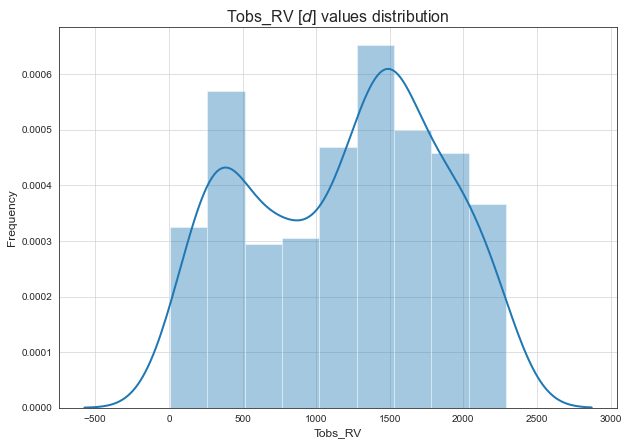

In [26]:
draw_hist(d1=gto['Tobs_RV'], d1_label="Tobs_RV [$d$]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_01_CARM_VIS_RV_Tobs_Histogram.png")

#### Number of points (RV)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean      51.979328
std       76.124792
min        4.000000
25%       14.000000
50%       30.000000
75%       60.000000
max      768.000000
Name: n_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


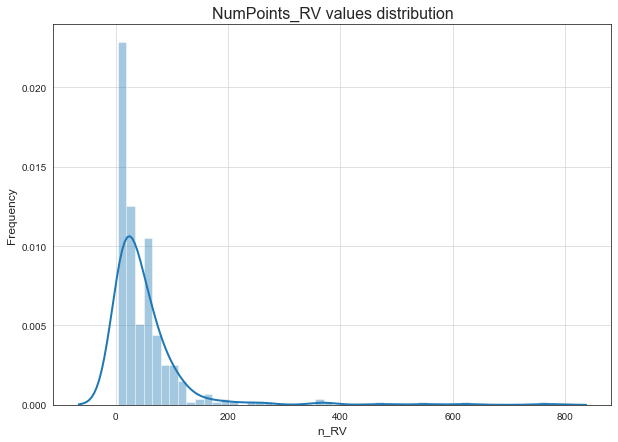

In [27]:
draw_hist(d1=gto['n_RV'], d1_label="NumPoints_RV",
          fig_filename=IMAGE_FOLDER + "Analysis_08_02_CARM_VIS_RV_NumPoints_Histogram.png")

#### Estimated missing time points in time span

In [28]:
##### PENDING --- 

#### Estimated gaps duration in time span

In [29]:
##### PENDING --- 

#### Sampling frequency in $d^{-1}$ (RV)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean       1.431340
std       17.256361
min        0.003251
25%        0.054617
50%        0.113243
75%        0.304807
max      314.907497
Name: fs_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


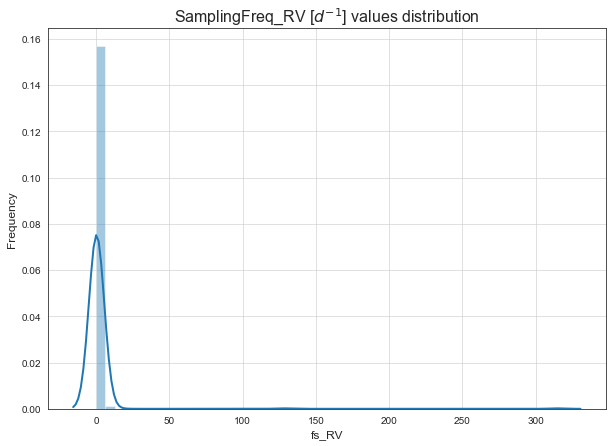

In [30]:
draw_hist(d1=gto['fs_RV'], d1_label="SamplingFreq_RV [$d^{-1}$]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_05_CARM_VIS_RV_SamplingFreq_Histogram.png")

#### Sampling period in $d$ (RV)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean      15.805441
std       28.078791
min        0.003176
25%        3.294005
50%        8.830573
75%       18.311180
max      307.604864
Name: Ps_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


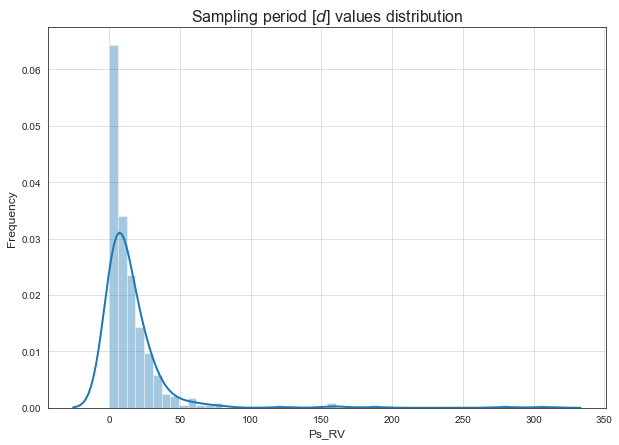

In [69]:
draw_hist(d1=gto['Ps_RV'], d1_label="Sampling period [$d$]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_05B_CARM_VIS_RV_SamplingPeriod_Histogram.png")

#### SNR (PG)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    3.870000e+02
mean     8.249183e+05
std      8.857004e+06
min      3.498642e-01
25%      1.240380e+00
50%      2.221912e+00
75%      6.684697e+00
max      1.441562e+08
Name: maxSNR_PG_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


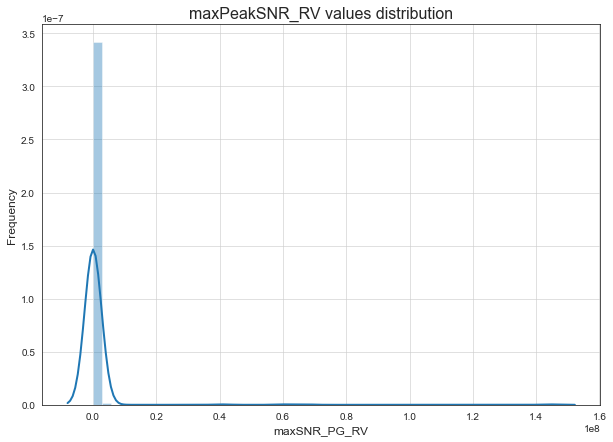

In [31]:
draw_hist(d1=gto['maxSNR_PG_RV'], d1_label="maxPeakSNR_RV",
          fig_filename=IMAGE_FOLDER + "Analysis_08_06_CARM_VIS_RV_maxPeakSNR_Histogram.png")

#### Detected period in minutes (PG)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean      80.568248
std      157.087721
min        5.003195
25%        6.972381
50%       10.540259
75%       32.439782
max      570.740060
Name: Pm_PG_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


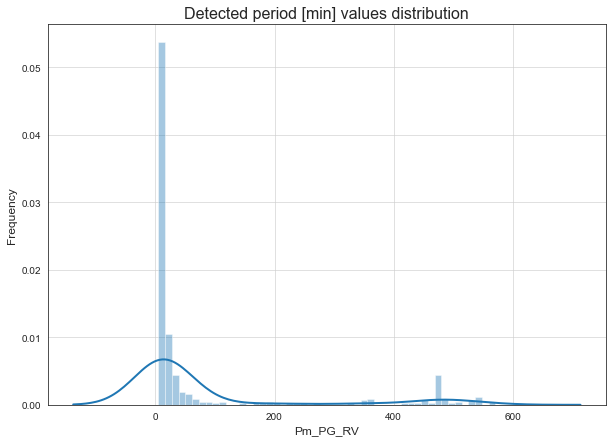

In [32]:
draw_hist(d1=gto['Pm_PG_RV'], d1_label="Detected period [min]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_07_CARM_VIS_RV_DetectedPeriod_min_Histogram.png")

#### Detected amplitudes (PG)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      387.000000
mean       516.940086
std       3492.533282
min          0.788573
25%          3.110067
50%          5.068001
75%         16.444242
max      36713.719151
Name: A_PG_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


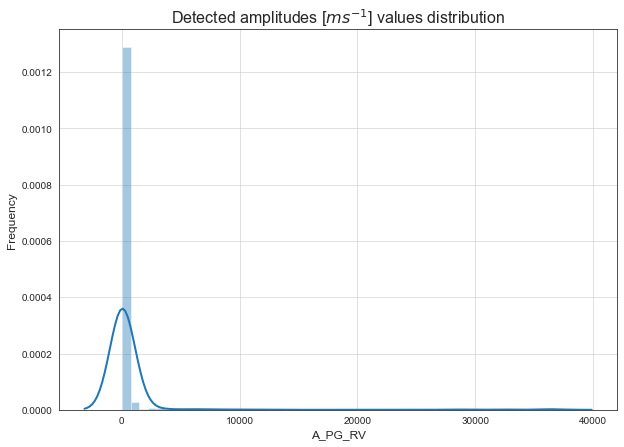

In [33]:
draw_hist(d1=gto['A_PG_RV'], d1_label="Detected amplitudes [$ms^{-1}$]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_08_CARM_VIS_RV_DetectedAmplitudes_Histogram.png")

#### RMS of the RV time series

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      387.000000
mean       361.871528
std       2564.902866
min          0.666710
25%          2.684700
50%          4.015005
75%         11.644566
max      31233.301918
Name: wrms_RV, dtype: float64
p = nan
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


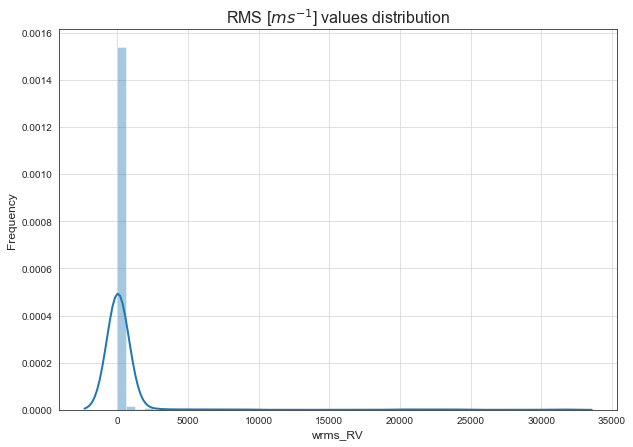

In [34]:
draw_hist(d1=gto['wrms_RV'], d1_label="RMS [$ms^{-1}$]",
          fig_filename=IMAGE_FOLDER + "Analysis_08_09_CARM_VIS_RV_RMS_Histogram.png")

Some RMS values seem unreasonably high. If we remove those below 500 $ms^{-1}$, we get: 

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    371.000000
mean      26.148352
std       65.012430
min        0.666710
25%        2.651969
50%        3.885563
75%        9.223283
max      431.297701
Name: wrms_RV, dtype: float64
p = 6.97489e-71
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


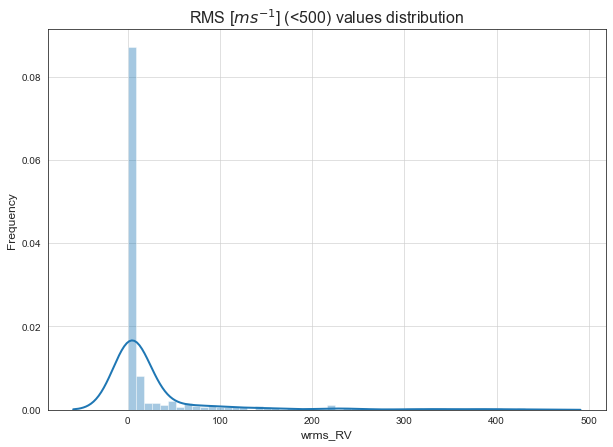

In [35]:
draw_hist(d1=gto[gto['wrms_RV'] < 500.0]['wrms_RV'], d1_label="RMS [$ms^{-1}$] (<500)",
          fig_filename=IMAGE_FOLDER + "Analysis_08_09B_CARM_VIS_RV_RMS_lt500_Histogram.png")

And further reducing to 100 $ms^{-1}$:

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    343.000000
mean      10.039506
std       18.173896
min        0.666710
25%        2.578898
50%        3.566341
75%        6.366688
max       99.907122
Name: wrms_RV, dtype: float64
p = 8.61082e-55
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


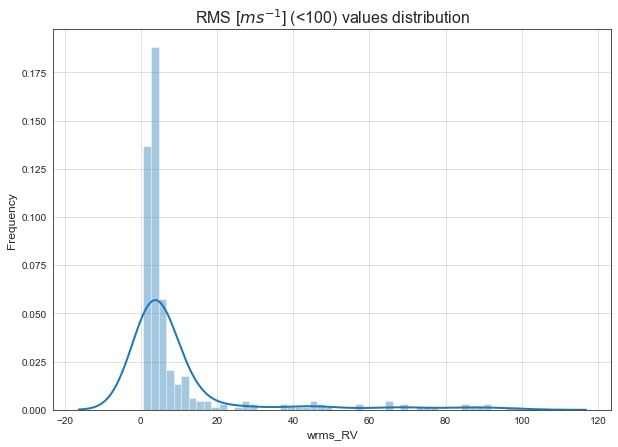

In [36]:
draw_hist(d1=gto[gto['wrms_RV'] < 100.0]['wrms_RV'], d1_label="RMS [$ms^{-1}$] (<100)",
          fig_filename=IMAGE_FOLDER + "Analysis_08_09C_CARM_VIS_RV_RMS_lt100_Histogram.png")

And reducing to 25 $ms^{-1}$:

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    309.000000
mean       4.604794
std        3.638561
min        0.666710
25%        2.503480
50%        3.294237
75%        4.974812
max       24.709496
Name: wrms_RV, dtype: float64
p = 3.20136e-41
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


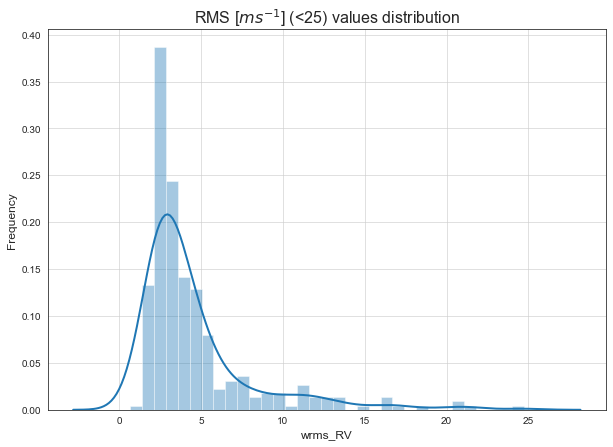

In [37]:
draw_hist(d1=gto[gto['wrms_RV'] < 25.0]['wrms_RV'], d1_label="RMS [$ms^{-1}$] (<25)",
          fig_filename=IMAGE_FOLDER + "Analysis_08_09D_CARM_VIS_RV_RMS_lt25_Histogram.png")

And reducing to 5 $ms^{-1}$:

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    233.000000
mean       3.021702
std        0.879263
min        0.666710
25%        2.365640
50%        2.812982
75%        3.593585
max        4.977859
Name: wrms_RV, dtype: float64
p = 0.00397062
This distribution MIGHT come from Gaussian distribution(with significance level = 0.999000)


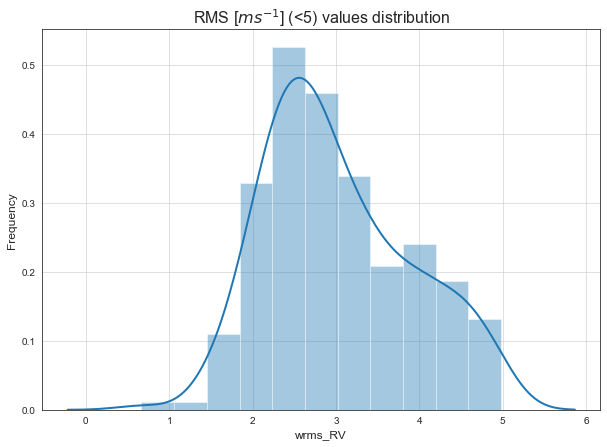

In [38]:
draw_hist(d1=gto[gto['wrms_RV'] < 5.0]['wrms_RV'], d1_label="RMS [$ms^{-1}$] (<5)",
          fig_filename=IMAGE_FOLDER + "Analysis_08_09E_CARM_VIS_RV_RMS_lt5_Histogram.png")

**OBSERVATION:** This could be the group of stars (low RMS values that we could try to be more interested in, let's see the available information we have for these subsample, related to the periodograms:

In [39]:
subset = gto[gto['wrms_RV'] < 5.0].copy()

In [40]:
len(subset)

233

In [41]:
len(subset[subset['valid_PG_RV'] == 0])

0

In [42]:
len(subset[subset['valid_PG_TESS'] == 0])

70

In [43]:
len(subset[(subset['valid_PG_RV'] == 1) & (subset['valid_PG_TESS'] == 1)])

163

Of these 233 objects with RMS < $5 ms^{-1}$, all of them have periodograms available for the RV time series, and 158 of them also have a corresponding _TESS_ light curve, with a correctly calculated periodogram.